# Lab 2: Clustering

The goal of this lab session is to code a clustering algorithm, apply it to data and compare the performance with other techniques.

You have to send the filled notebook named **"L2_familyname1_familyname2.ipynb"** (groups of 2) by email to aml.centralesupelec.2019@gmail.com by October 9, 2019. Please put **"AML-L2"** in the subject. 

We begin with the standard imports:

In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster # all clustering techniques except hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

We will have two toy datasets to try the different methods:

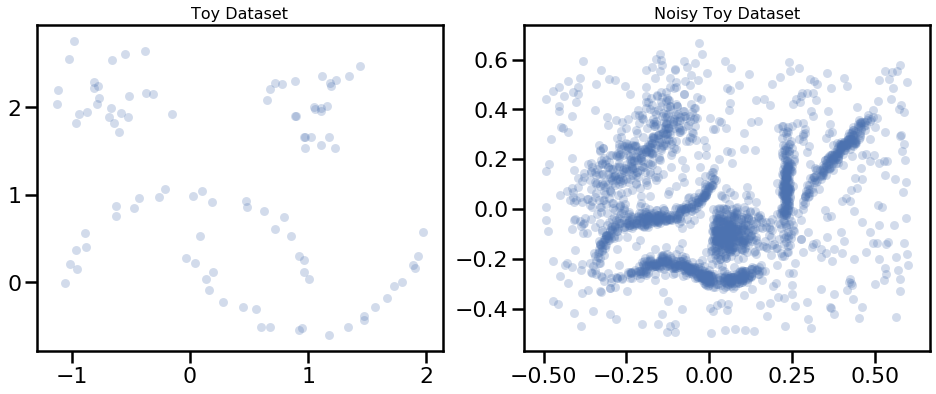

In [6]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])
test_data_1 = np.load('clusterable_data-1.npy')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', **plot_kwds)
ax[1].set_title('Noisy Toy Dataset', size=16)

plt.show();

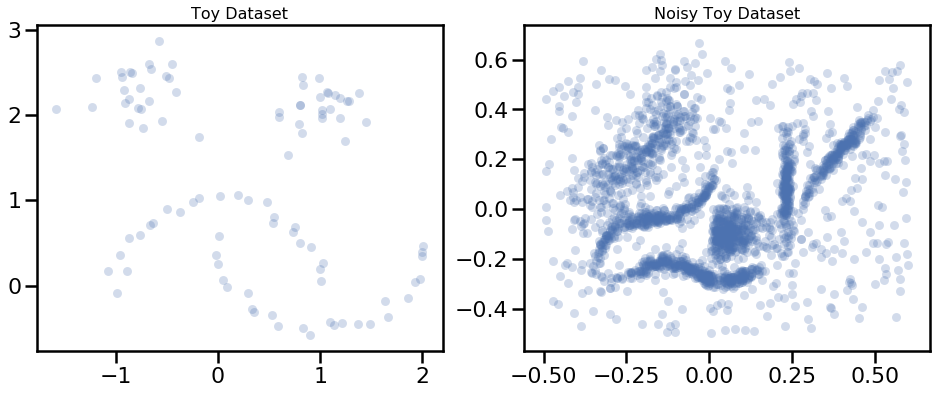

In [2]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])
test_data_1 = np.load('clusterable_data-1.npy')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', **plot_kwds)
ax[1].set_title('Noisy Toy Dataset', size=16)

plt.show();

There are a lot of clustering algorithms to choose from the `sklearn` library. So what clustering algorithms should you be using? It depends.

## K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

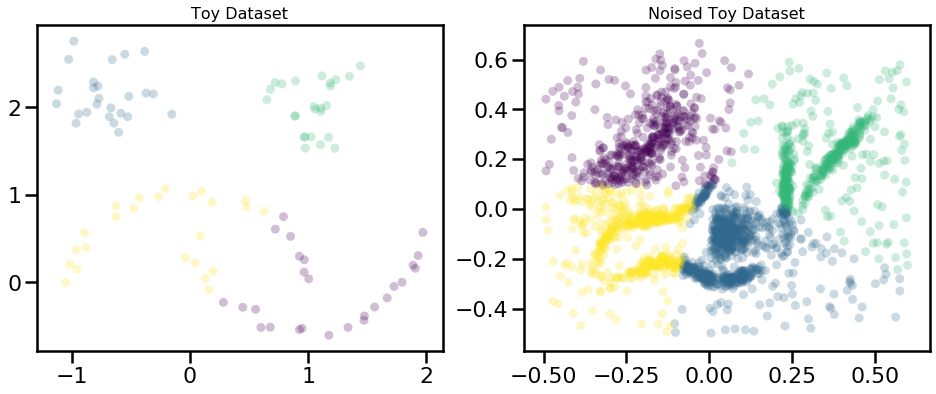

In [21]:
from sklearn.cluster import KMeans
kmeans_0 = KMeans(n_clusters=4, max_iter=200).fit(test_data_0)
kmeans_1 = KMeans(n_clusters=4, max_iter=200).fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0.labels_ , **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)


plt.show();

## Aglomerative Single Linkage clustering

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.

**Code your own Aglomerative Single Linkage clustering algorithm**!:

- Fill in the class 
- During the process, keep track of the cluster merges by saving a (num_samples-1,4) np.array being a linkage matrix in scypy format (to use their function to plot dendrogram: `scipy.cluster.hierarchy.dendrogram`). check documentation.

In [4]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [5]:
class my_SingleLinkageAglomerativeClustering():
    
    def __init__(self, metric="euclidean", n_clusters=3):
        '''
        Attributes:
        
        metric_: {"euclidean","precomputed"}
            the distance to be used
            if precomputed then X is distance matrix
        n_clusters: integer
            number of clusters to return 
        linkage_matrix_: (n-1, 4) np.array
            in the same format as linkage  
        labels_: integer np.array
            label assigment
        hierarchy_: list of np.array
            each array corresponds to label assigment
            at each level (number of clusters)
            hierarchy_[0]=np.array(list(range(n)))
        '''
        self.metric_ = metric
        self.n_clusters_ = n_clusters
        self.linkage_matrix_ = None
        self.labels_ = None
        self.hierarchy_ = None
        self.count_= None
        
    def fit(self, X):
        """ Create a hierarchy of clusters
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        self: my_SingleLinkageAglomerativeClustering
            to have access to labels_
        """
        # if it's not precomputed compute the distance matrix
        # using from scipy.spatial import distance 
        
        # HINT:
        # You can use a minimum spanning tree and add merge in increasing order
        # or modifying the distance matrix 
        # (add row/column for new clusters and remove/put zero in old row/colums)
        
        # keep track of merges in linkage_matrix_ and labels in hierarchy_
        
        # update labels_ from the hierarchy level selected by n_clusters_ 
        link= np.zeros((len(X),4))
        dist= scipy.spatial.distance.cdist(X,X, metric='euclidean')
        n=len(X)
        self.count_=[1 for i in range(n)]
        self.hierarchy_=[]
        a= np.array(list(range(n)))
        dist[range(n), range(n)]=10000
        i=-1
        while self.count_[-1]<=n :
            i+=1
            b=np.copy(a)
            self.hierarchy_.append(b)
            #print(b)
            if len(np.unique(b))==self.n_clusters_:
                self.labels_=b
            ind = np.unravel_index(np.argmin(dist, axis=None), dist.shape)
            self.count_.append(self.count_[a[ind[0]]]+self.count_[a[ind[1]]])
            #print(self.count_[n:])
            id1=  np.where(a== a[ind[0]])
            id2=  np.where(a== a[ind[1]])
            link[i][0]= int(a[ind[0]])
            link[i][1]= int(a[ind[1]])
            link[i][2]= round(np.min(dist),3)
            link[i][3]= int(self.count_[-1])
            #print(link)
            for k in range(np.shape(id1)[1]):
                a[id1[0][k]]=n+i
            for l in range(np.shape(id2)[1]):
                a[id2[0][l]]=n+i
            for k in range(np.shape(id1)[1]):
                for j in range(np.shape(id2)[1]):
                    dist[id1[0][k], id2[0][j]]=10000
                    dist[id2[0][j], id1[0][k]]=10000
            b=np.copy(a)
        self.linkage_matrix_= link[:-1][:]        
    def plot_dendrogram(self):
        '''
        Use self.linkage_matrix_ in `scipy.cluster.hierarchy.dendrogram` 
        to plot the dendrogram of the hierarchical structure
        '''     
        link= self.linkage_matrix_
        plt.figure()
        fig, axes = plt.subplots(1, 1, figsize=(16, 16))
        dn = hierarchy.dendrogram(self.linkage_matrix_)
        plt.show()
        

<Figure size 432x288 with 0 Axes>

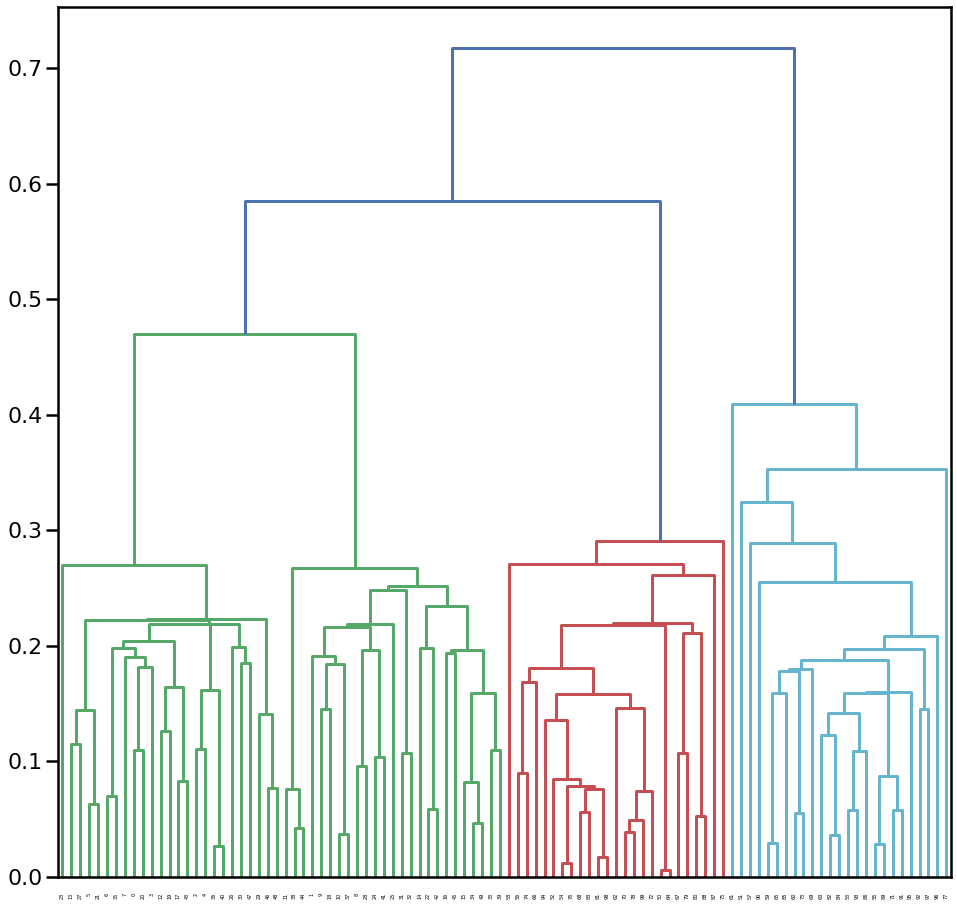

[196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196
 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196
 196 196 196 196 196 196 196 196 196 196 196 196 196 196 192 195 192 195
 192 195 192 195 192 195 195 195 192 195 192 195 192 192 192 195 192 195
 192 195 192 192 192 195 192 192 192 192 195 192 195 195 195 192 192 195
 195 195 195 195 192 195 195 195 192 192]


In [6]:
model= my_SingleLinkageAglomerativeClustering()
model.fit(test_data_0)
model.plot_dendrogram()
print(model.labels_)

Apply the method to our toy datasets

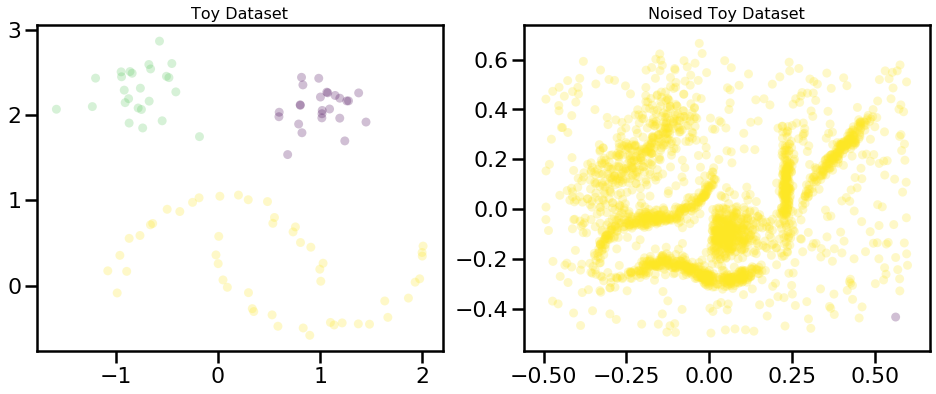

In [7]:
from scipy.spatial import distance 
from scipy.cluster.hierarchy import dendrogram

# TODO
model= my_SingleLinkageAglomerativeClustering(n_clusters=3)
model.fit(test_data_0)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=model.labels_ , **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

model_1= my_SingleLinkageAglomerativeClustering(n_clusters=3)
model_1.fit(test_data_1)
ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=model_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)


plt.show();

<Figure size 432x288 with 0 Axes>

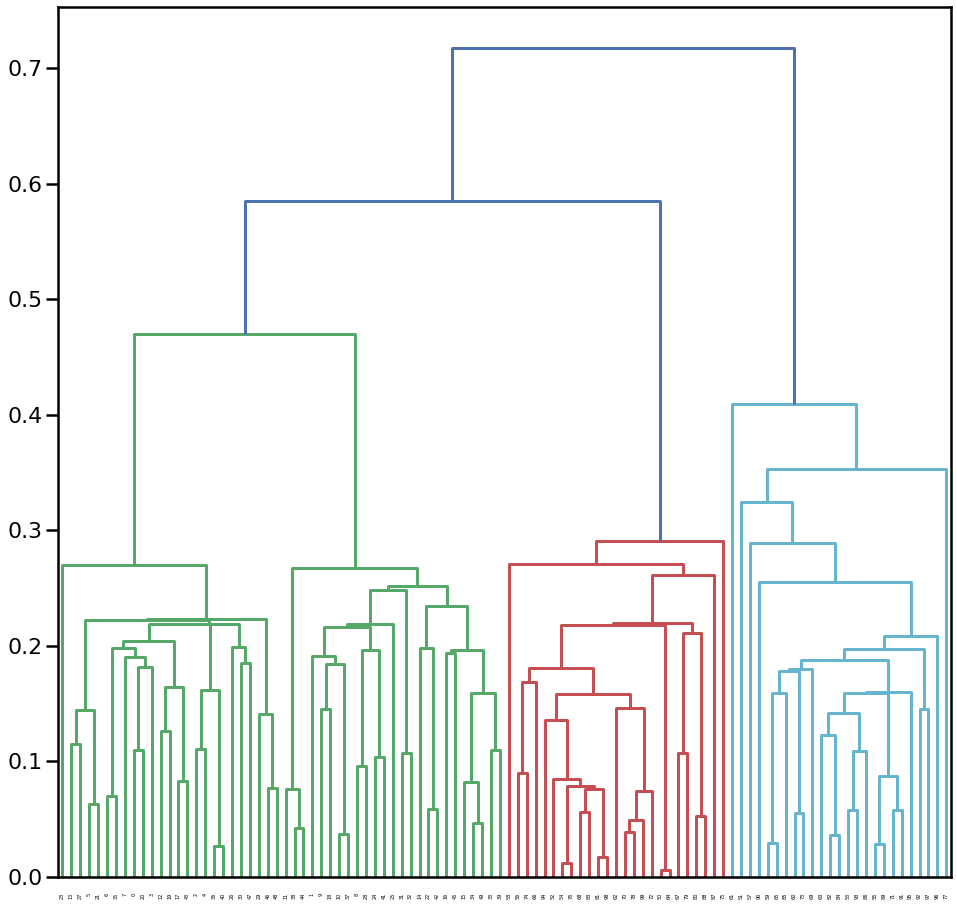

In [8]:
model.plot_dendrogram()

Try the different linkage methods implemented in `sklearn`  and comment

    We will be using the AgglomerativeClustering package from sklearn with different linkage methods

Text(0.5, 0.98, 'Single linkage')

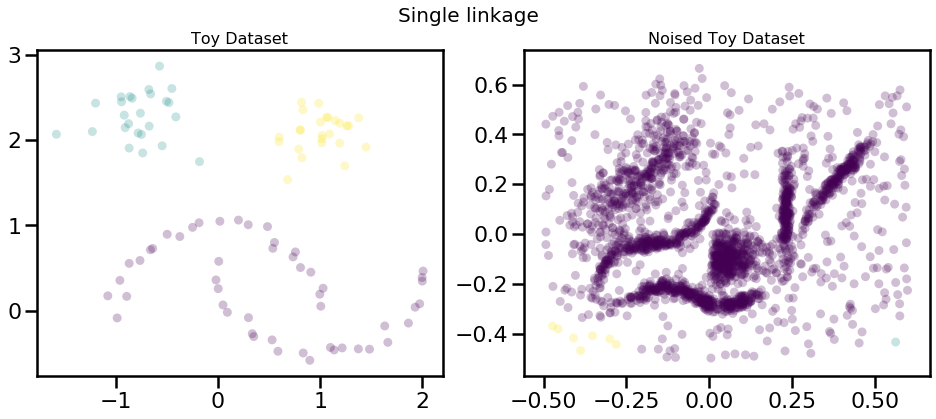

In [9]:
# linkage = single
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3,linkage="single").fit(test_data_0)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=clustering.labels_ , **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

clustering_1 = AgglomerativeClustering(n_clusters=3,linkage="single").fit(test_data_1)
ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=clustering_1.labels_ , **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

fig.suptitle("Single linkage",fontsize=20)

    -we can see that Single linkage that uses the minimum of the distances between all observations of two sets can't handle noisy data and it is sensitive to outliers.

Text(0.5, 0.98, "Ward's method")

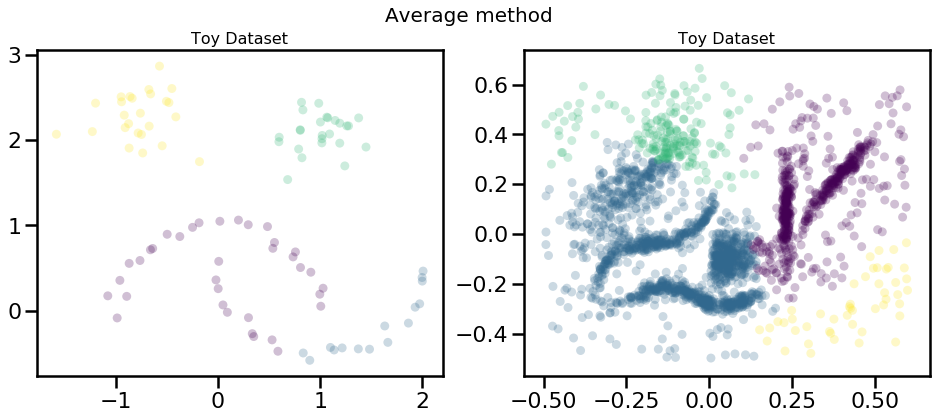

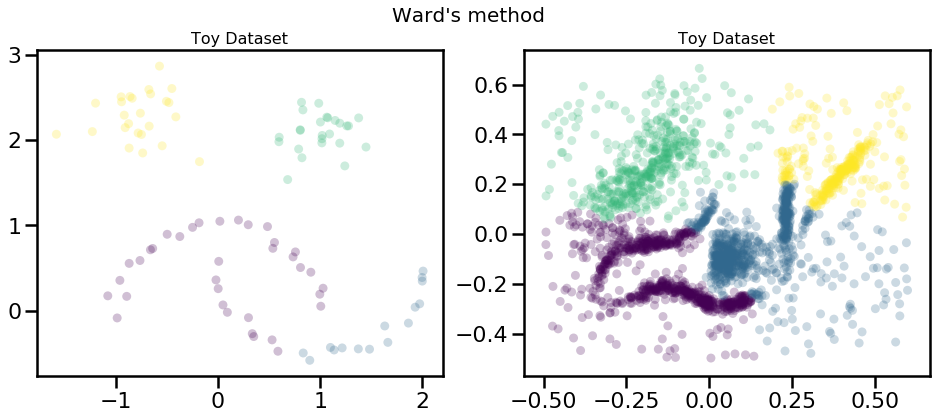

In [10]:
#Linkage = average
clustering = AgglomerativeClustering(n_clusters=4,linkage="average").fit(test_data_0)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=clustering.labels_ , **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

clustering_1 = AgglomerativeClustering(n_clusters=4,linkage="average").fit(test_data_1)
ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=clustering_1.labels_ , **plot_kwds)
ax[1].set_title('Toy Dataset', size=16)

fig.suptitle("Average method",fontsize=20)

#Linkage = Ward
clustering = AgglomerativeClustering(n_clusters=4,linkage="ward").fit(test_data_0)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=clustering.labels_ , **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

clustering_1 = AgglomerativeClustering(n_clusters=4,linkage="ward").fit(test_data_1)
ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=clustering_1.labels_ , **plot_kwds)
ax[1].set_title('Toy Dataset', size=16)

fig.suptitle("Ward's method",fontsize=20)

    -In this case, we are taking all the pairs of points and compute their similarities and calculate the average of the similarities.
    1) Average method: sim(C1,C2) = ∑ sim(Pi, Pj)/|C1|*|C2|
    2) Ward's method : sim(C1,C2) = ∑ (dist(Pi, Pj))²/|C1|*|C2|
    
    We can see that those two methods handle well noisy datasets, but they have tendence to detect           spherical (Circular in case of 2D) clusters

## DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

Apply it to the test_data, how do you tune the parameters?

### 1) Own implementation of the DBSCAN

In [11]:
from scipy import spatial
class my_DBSCAN():
    def __init__(self,metric="euclidean", epsilon=0.75, MinPts=3):
        self.metric = metric
        self.epsilon = epsilon
        self.MinPts = MinPts
        self.labels=None
    def find_neighbors(self,X,p):
        #Find all the neighbors of a point p in X such that dist(p,u)<epsilon
        output=[]
        for i in range(0,len(X)):
            if spatial.distance.cdist([X[i]],[p], metric=self.metric)[0][0]<self.epsilon:
                output.append(i)
        return output
    def extend_cluster(self,X,p,label_cluster):
        #we extend a cluster in case of neighbors(p)>=MinPts
        neighbors=my_DBSCAN.find_neighbors(self,X,X[p])
        self.labels[p]=label_cluster
        for i in range (0,len(neighbors)):
            pi=neighbors[i]   #pi is a core point
            if self.labels[pi]==-1:  #might be assigned as a noise
                self.labels[pi]=label_cluster
            elif self.labels[pi]==0: #not seen by the algo yet
                self.labels[pi]=label_cluster
                neighbors_pi=my_DBSCAN.find_neighbors(self,X,X[pi])
                if len(neighbors_pi)>=self.MinPts:
                    neighbors+=neighbors
                    neighbors=list(np.unique(neighbors))
    def fit(self,X):
        self.labels=[0]*len(X)
        label_cluster=0
        for p in range(len(X)):
            if self.labels[p]==0:
                neighbors=my_DBSCAN.find_neighbors(self,X,X[p])
                if len(neighbors)<self.MinPts:
                    #print(neighbors)
                    self.labels[p]=-1
                else:
                    #print("hola extend")
                    label_cluster+=1
                    my_DBSCAN.extend_cluster(self,X,p,label_cluster) 
# TODO

Text(0.5, 1.0, 'Toy Dataset')

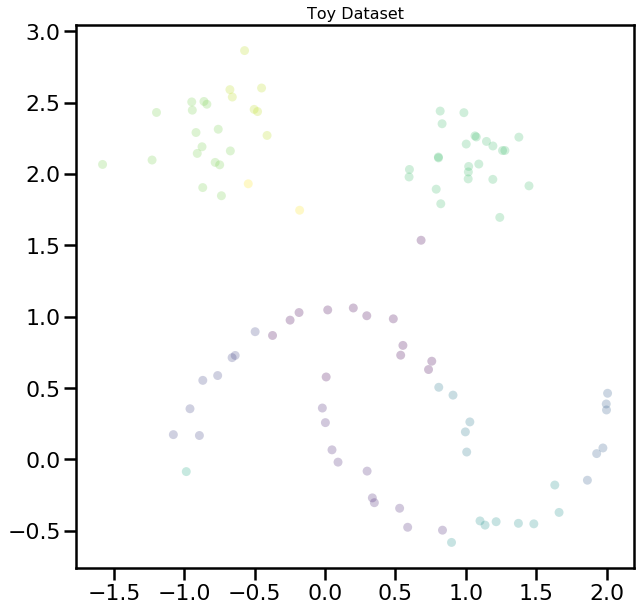

In [12]:
dbscan=my_DBSCAN(epsilon=0.7,MinPts=3)
dbscan.fit(test_data_0)
plt.figure(figsize=(10,10))
plt.scatter(test_data_0.T[0], test_data_0.T[1], c=dbscan.labels , **plot_kwds)
plt.title('Toy Dataset', size=16)

## Importing DBSCAN from Sklearn

## Tuning hyperparameters

MinPts that corresponds to the minumun number of points a cluster can have depends only on what the user wants to find. However, we can choose it big enough to exclude outliers and not make clusters of them.
Second parameter is epsilon.It defines the radius of neighborhood around a point x. The value for ϵ can be chosen by using a k-distance graph, plotting the mean distance to the k = minPts nearest neighbors to each points in ascending order.
For points in dense regions will have a mean distance to the K-nn that tends to 0. However, for outliers that quantity tends to +infity. Then we can choose ϵ as he point that corresponds to a knee in the plot.

In [7]:
from sklearn.neighbors import NearestNeighbors
k=10
classifier = NearestNeighbors(n_neighbors=k)
classifier.fit(test_data_0)
dist_0,index_0=classifier.kneighbors(test_data_0)

In [8]:
# For MinPts = 10
k=150
classifier = NearestNeighbors(n_neighbors=k)
classifier.fit(test_data_1)
dist_1,index_1=classifier.kneighbors(test_data_1)

Text(0.5, 1.0, 'test_data_1 (MinPts = 150)')

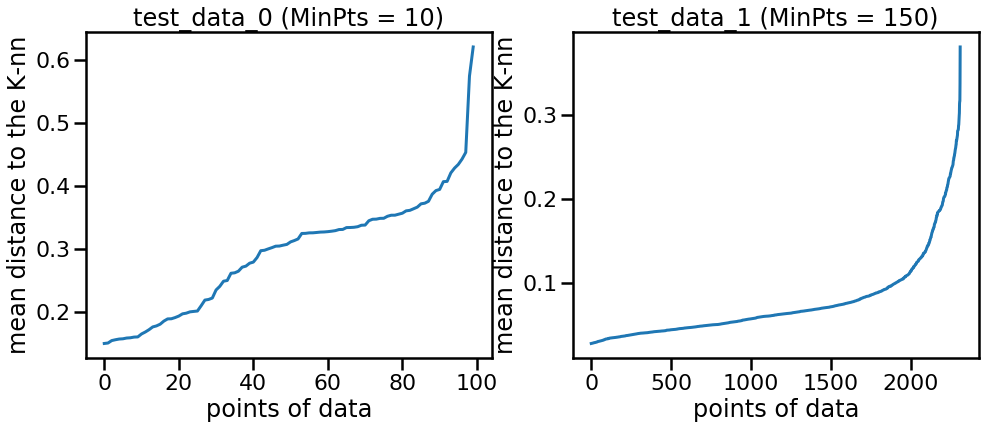

In [9]:
import numpy as np
dist_0=np.sort([np.mean(dist_0[i]) for i in range (len(dist_0))])
dist_1=np.sort([np.mean(dist_1[i]) for i in range (len(dist_1))])

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(np.array(np.arange(len(dist_0))),np.array(dist_0))
ax[1].plot(np.array(np.arange(len(dist_1))),np.array(dist_1))
ax[0].set_xlabel('points of data')
ax[0].set_ylabel('mean distance to the K-nn')
ax[1].set_xlabel('points of data')
ax[1].set_ylabel('mean distance to the K-nn')
ax[0].set_title("test_data_0 (MinPts = 10)")
ax[1].set_title("test_data_1 (MinPts = 150)")

we can choose the epsilon as the mean distance where we have a knee in the plot.
In this case we can choose epsilon=0.4 for test_data_0
For test_data_1 there is no visible knee in the plot.

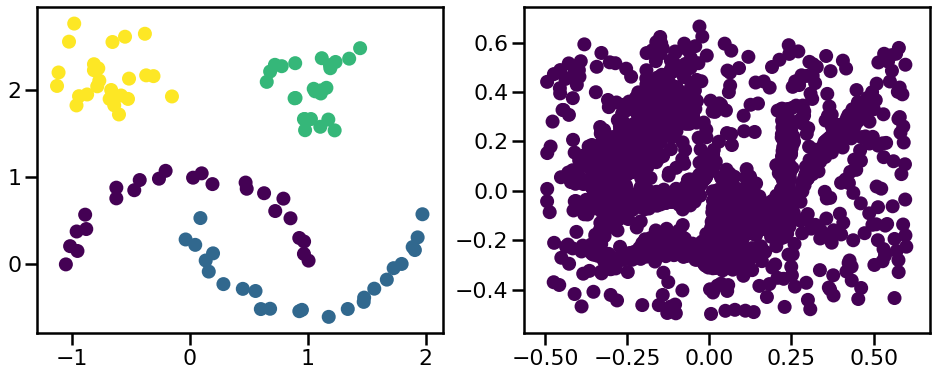

In [10]:
from sklearn.cluster import DBSCAN
dbscan_0 = DBSCAN(eps=.4,min_samples=3)
dbscan_0.fit(test_data_0)
dbscan_1 = DBSCAN(eps=.4,min_samples=150)
dbscan_1.fit(test_data_1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0],test_data_0.T[1],c=dbscan_0.labels_)
ax[1].scatter(test_data_1.T[0],test_data_1.T[1],c=dbscan_1.labels_)

## HDBSCAN

HDBSCAN is a recent algorithm developed by some of the same people who write the original DBSCAN paper. Their goal was to allow varying density clusters. The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points 'falling out of a cluster'. This results in a smaller tree with fewer clusters that 'lose points'. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability.

Text(0.5, 1.0, 'Noised Toy Dataset')

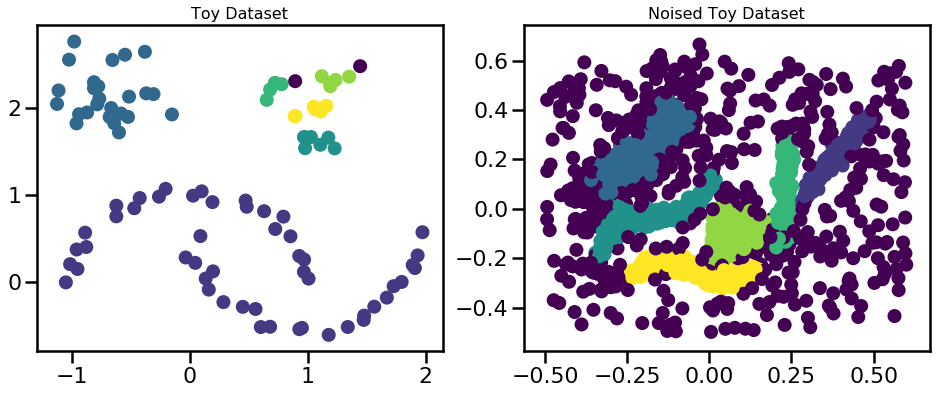

In [15]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=3,algorithm='boruvka_kdtree')
cluster_labels = clusterer.fit_predict(test_data_0)
clusterer_1 = hdbscan.HDBSCAN(min_cluster_size=15,algorithm='boruvka_kdtree')
cluster_labels_1 = clusterer_1.fit_predict(test_data_1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0],test_data_0.T[1],c=cluster_labels)
ax[1].scatter(test_data_1.T[0],test_data_1.T[1],c=cluster_labels_1)
ax[0].set_title('Toy Dataset', size=16)
ax[1].set_title('Noised Toy Dataset', size=16)


## Apply the algorithms to the following images and comment the results

### NASA Curiosity Picture

- Look at following NASA photo taken by a robot in mars:


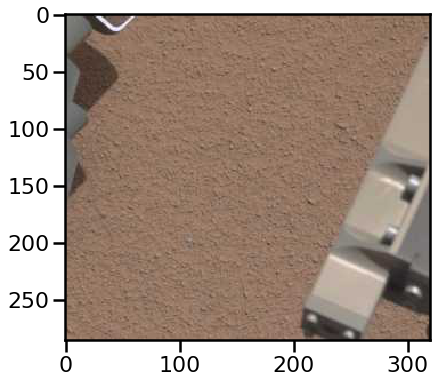

In [16]:
from PIL import Image

Im_1  = Image.open('im_nasa_reduced-1.jpg')

fig = plt.figure(figsize=(8, 6))
plt.imshow(Im_1)
plt.show()



- Transform the image to an intensity (I) and saturation (S) representation, it helps to distinguish bright and textures.

$$I=\frac{R+G+B}{3}$$
$$S=1-I\times min(R, G, B)$$

In [17]:
I = np.mean(Im_1 ,axis=2)
S = 1-I*np.min(Im_1, axis=2)

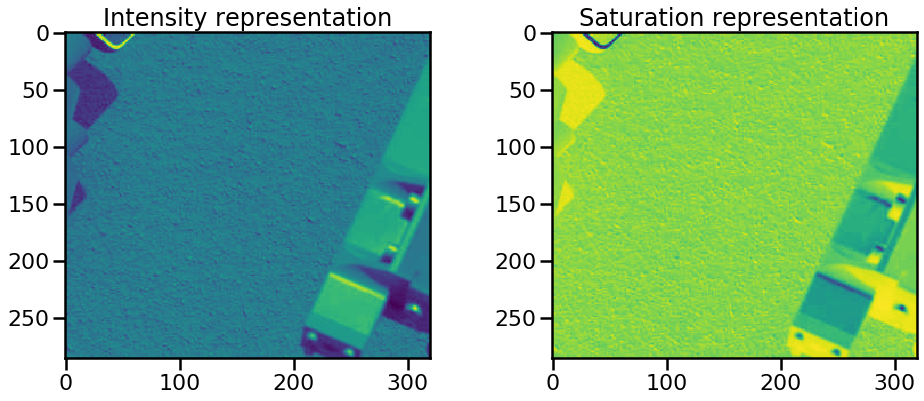

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].imshow(I)
ax[0].set_title("Intensity representation")

ax[1].imshow(S)
ax[1].set_title("Saturation representation")

plt.show()

- Apply the seen algorithms to segment the image in the Intensity-Saturation representation, comment the results and check if you find something on mars' surface. Be careful with hdbscan and memory errors for some parameters choice (use algorithm='boruvka_kdtree').

 HDSCAN

Text(0.5, 0.98, 'Clustering using HDBSCAN')

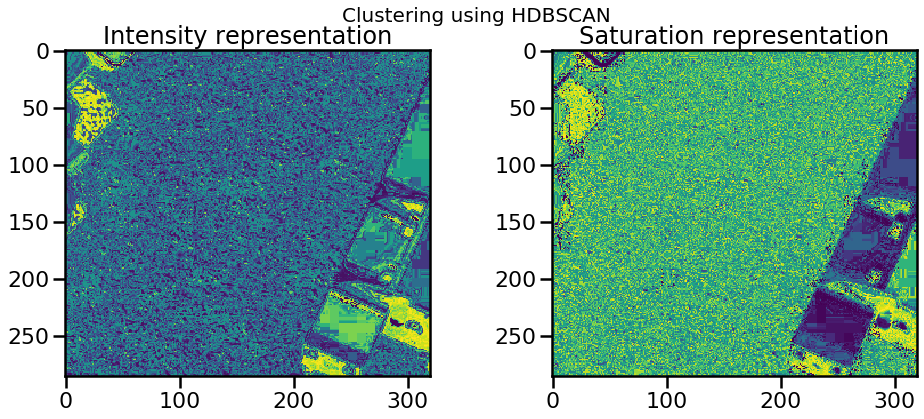

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

model = hdbscan.HDBSCAN(algorithm='boruvka_kdtree')
model.fit(I.flatten().reshape(-1,1))
model_1 = hdbscan.HDBSCAN(algorithm='boruvka_kdtree')
model_1.fit(S.flatten().reshape(-1,1))
plt.imshow(model.labels_.reshape(I.shape))
ax[0].imshow(model.labels_.reshape(I.shape))
ax[0].set_title("Intensity representation")

ax[1].imshow(model_1.labels_.reshape(S.shape))
ax[1].set_title("Saturation representation")

fig.suptitle("Clustering using HDBSCAN",fontsize=20)

Text(0.5, 0.98, 'Clustering using K-means')

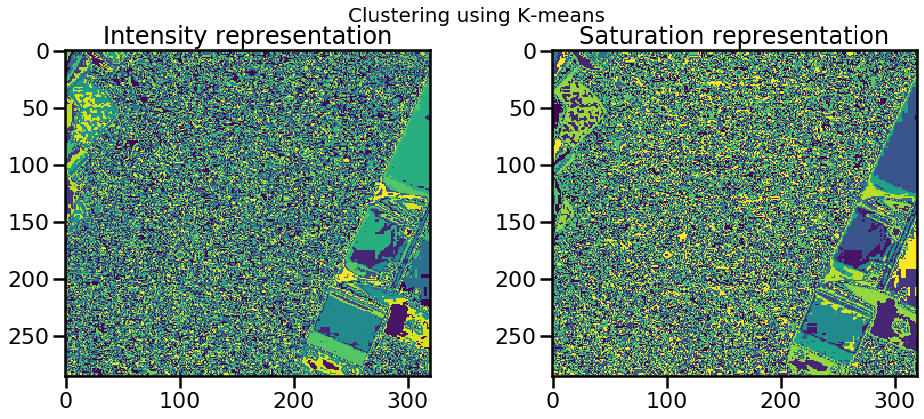

In [22]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

model = KMeans(n_clusters=20, max_iter=200).fit(I.flatten().reshape(-1,1))

model_1 = KMeans(n_clusters=20, max_iter=200).fit(S.flatten().reshape(-1,1))

plt.imshow(model.labels_.reshape(I.shape))
ax[0].imshow(model.labels_.reshape(I.shape))
ax[0].set_title("Intensity representation")

ax[1].imshow(model_1.labels_.reshape(S.shape))
ax[1].set_title("Saturation representation")

fig.suptitle("Clustering using K-means",fontsize=20)

### Color compression

One interesting application of clustering is in color compression within images. 
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

Get a simplified 10-colored version of the following image by applying k-means. Plot both images.

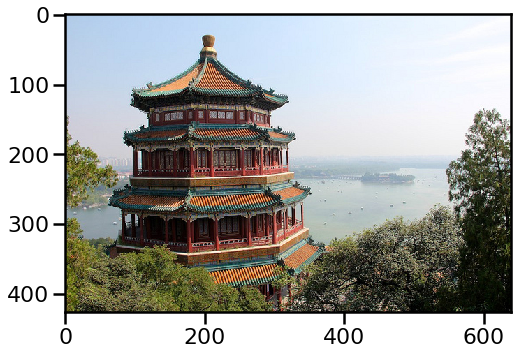

In [23]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(china);

In [24]:
china.shape

(427, 640, 3)

In [25]:
CHINA=china.reshape((427*640,3))

In [26]:
from sklearn.cluster import KMeans
kmeans_c = KMeans(n_clusters=10, max_iter=200).fit(CHINA)

Text(0.5, 1.0, 'Simplified 10-colored version')

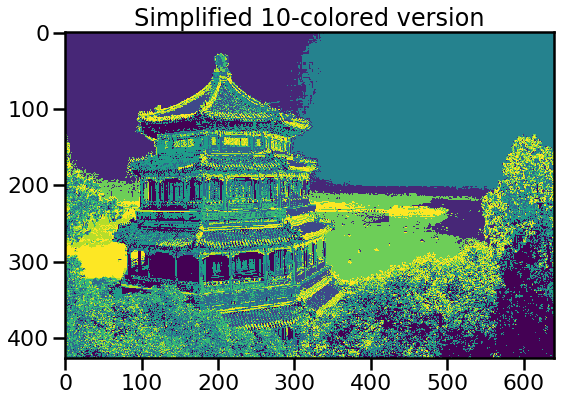

In [27]:
plt.figure(figsize=(16,6))
plt.imshow(kmeans_c.labels_.reshape(427,640))
plt.title("Simplified 10-colored version")

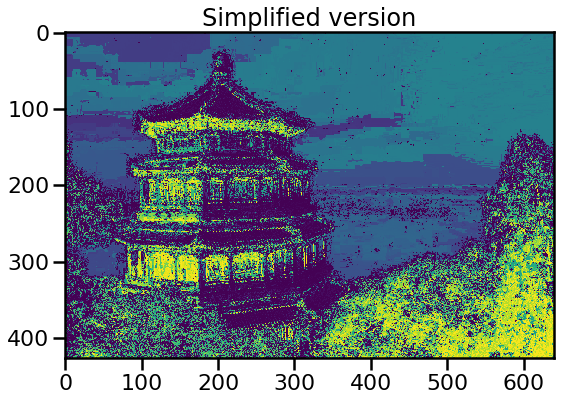

In [28]:
plt.figure(figsize=(16,6))
plt.title("Simplified version")
model = hdbscan.HDBSCAN(algorithm='boruvka_kdtree')
model.fit(CHINA)
plt.imshow(model.labels_.reshape(427,640))